In [4]:
# Created: 20250103

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("requests"))

requests==2.32.3



In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Step 2: Calculate Williams %R
def calculate_williams_r(data1, lookback=14):
    # Ensure rolling operations return single Series
    highest_high = data1['High'].rolling(window=lookback).max()
    lowest_low = data1['Low'].rolling(window=lookback).min()
    
    # Calculate Williams %R
    data1['Williams %R'] = ((highest_high - data1['Close']) / 
                           (highest_high - lowest_low)) * -100
    
    return data1

In [9]:
def show_graph(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply the Williams %R calculation
    data = calculate_williams_r(data)
    
    # Step 3: Plot Williams %R
    plt.figure(figsize=(14, 7))
    
    # Plot Close Price
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title(f'{symbol} Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    # Plot Williams %R
    plt.subplot(2, 1, 2)
    plt.plot(data['Williams %R'], label='Williams %R', color='purple')
    plt.axhline(-20, color='red', linestyle='--', label='Overbought (-20)')
    plt.axhline(-80, color='green', linestyle='--', label='Oversold (-80)')
    plt.title('Williams %R')
    plt.xlabel('Date')
    plt.ylabel('%R')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  1 of 1 completed


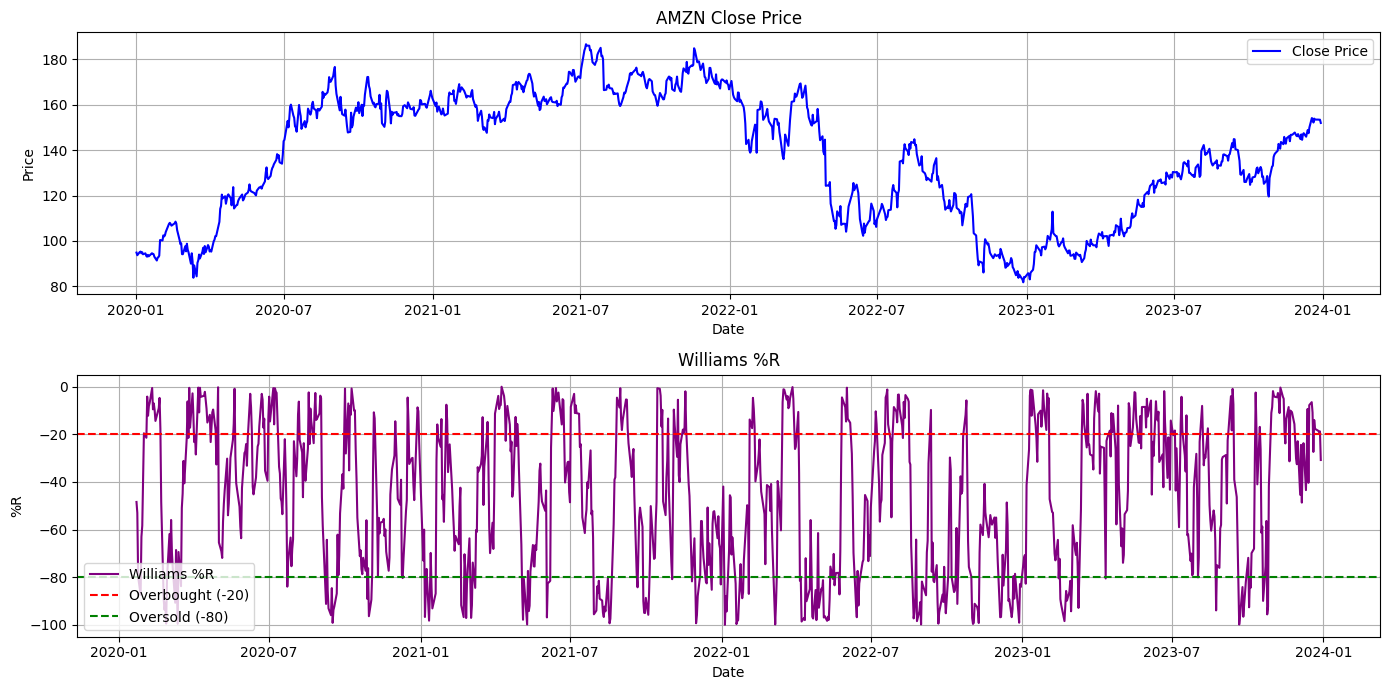

In [10]:
show_graph("AMZN")